In [2]:
import pandas as pd


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# G protein correlation

## Read experimental data

In [3]:
receptors = pd.read_csv(
    "/Users/xiaomuou620/Desktop/PRIVATE_DATA/hallucinome.csv"
) 

print(receptors.head())

  receptor gprotein        drug    Emax  Emax_SE    TCoeff  TCoeff_SE  \
0    5HT1A      Gi1   25C-NBOMe  999.00   999.00       NaN        NaN   
1    5HT1A      Gi1    25I-NBMD   18.62     2.06  8.878197   0.201061   
2    5HT1A      Gi1   25I-NBOMe   24.53     3.28  7.947086   0.195392   
3    5HT1A      Gi1  25T7-NBOMe   22.00     3.87  7.457872   0.217788   
4    5HT1A      Gi1  4-AcO-MALT   38.93     5.16  7.417719   0.148907   

    logEmEC  logEmEc_Lower  logEmEc_Upper   pEC50  pEC50_SE  N  
0       NaN            NaN            NaN  999.00    999.00  3  
1  8.879980       8.529060       9.225551    7.61      0.30  3  
2  7.949698       7.607359       8.284201    6.56      0.28  3  
3  7.462423       7.078398       7.832796    6.12      0.30  3  
4  7.420284       7.158531       7.674340    5.83      0.20  3  


In [12]:
# replace 999 in Emax with 0
# receptors["Emax"] = receptors["Emax"].replace(999, 0)
receptors["pEC50"] = receptors["pEC50"].replace(999, 0)
print(receptors.head())


  receptor gprotein        drug   Emax  Emax_SE    TCoeff  TCoeff_SE  \
0    5HT1A      Gi1   25C-NBOMe   0.00   999.00       NaN        NaN   
1    5HT1A      Gi1    25I-NBMD  18.62     2.06  8.878197   0.201061   
2    5HT1A      Gi1   25I-NBOMe  24.53     3.28  7.947086   0.195392   
3    5HT1A      Gi1  25T7-NBOMe  22.00     3.87  7.457872   0.217788   
4    5HT1A      Gi1  4-AcO-MALT  38.93     5.16  7.417719   0.148907   

    logEmEC  logEmEc_Lower  logEmEc_Upper  pEC50  pEC50_SE  N  
0       NaN            NaN            NaN   0.00    999.00  3  
1  8.879980       8.529060       9.225551   7.61      0.30  3  
2  7.949698       7.607359       8.284201   6.56      0.28  3  
3  7.462423       7.078398       7.832796   6.12      0.30  3  
4  7.420284       7.158531       7.674340   5.83      0.20  3  


## Correlation Calculates

In [13]:
# Create a pivot table
g_protein_pivot = receptors.pivot_table(
    index="drug", columns="gprotein", values="pEC50", aggfunc="mean"
).fillna(0)

# Print the pivot table
print(g_protein_pivot.head())


gprotein    BArr2       G11       G15       Gi1       Gi2       Gi3       GoA  \
drug                                                                            
25C-NBOMe    8.75  4.586667  4.430000  0.000000  0.502727  0.000000  0.000000   
25I-NBMD     8.43  4.205000  4.146667  1.762589  2.276114  1.554502  1.986650   
25I-NBOMe    8.98  4.836667  4.620000  2.542727  1.190000  0.535455  1.568041   
25T7-NBOMe   8.31  5.575000  4.630000  2.317734  1.402727  1.110522  0.946609   
4-AcO-MALT   7.12  4.093333  4.670000  3.038333  3.140102  3.648889  3.959600   

gprotein         GoB        Gq        Gz      GαsS  
drug                                                
25C-NBOMe   0.995065  4.466667  1.664375  0.000000  
25I-NBMD    2.422005  3.958333  2.047850  0.790000  
25I-NBOMe   1.535833  4.370000  1.593750  0.854286  
25T7-NBOMe  0.953859  4.446667  1.846250  1.802857  
4-AcO-MALT  4.468715  3.985000  3.679168  1.024286  


In [14]:
# Compute the correlation matrix
g_protein_corr = g_protein_pivot.corr()

# Print the correlation matrix
print(g_protein_corr)


gprotein     BArr2       G11       G15       Gi1       Gi2       Gi3  \
gprotein                                                               
BArr2     1.000000  0.426075  0.509952  0.086129  0.115468  0.066743   
G11       0.426075  1.000000  0.866328  0.498866  0.515810  0.461040   
G15       0.509952  0.866328  1.000000  0.621050  0.649534  0.591412   
Gi1       0.086129  0.498866  0.621050  1.000000  0.964505  0.953102   
Gi2       0.115468  0.515810  0.649534  0.964505  1.000000  0.965510   
Gi3       0.066743  0.461040  0.591412  0.953102  0.965510  1.000000   
GoA       0.166231  0.499496  0.673193  0.948055  0.975568  0.951831   
GoB       0.218227  0.496588  0.652923  0.913682  0.952624  0.925858   
Gq        0.481096  0.926980  0.890788  0.525727  0.530506  0.512726   
Gz        0.199409  0.533133  0.692963  0.913032  0.940456  0.935588   
GαsS      0.008836  0.163086  0.265521  0.586979  0.595078  0.586532   

gprotein       GoA       GoB        Gq        Gz      GαsS  
gp

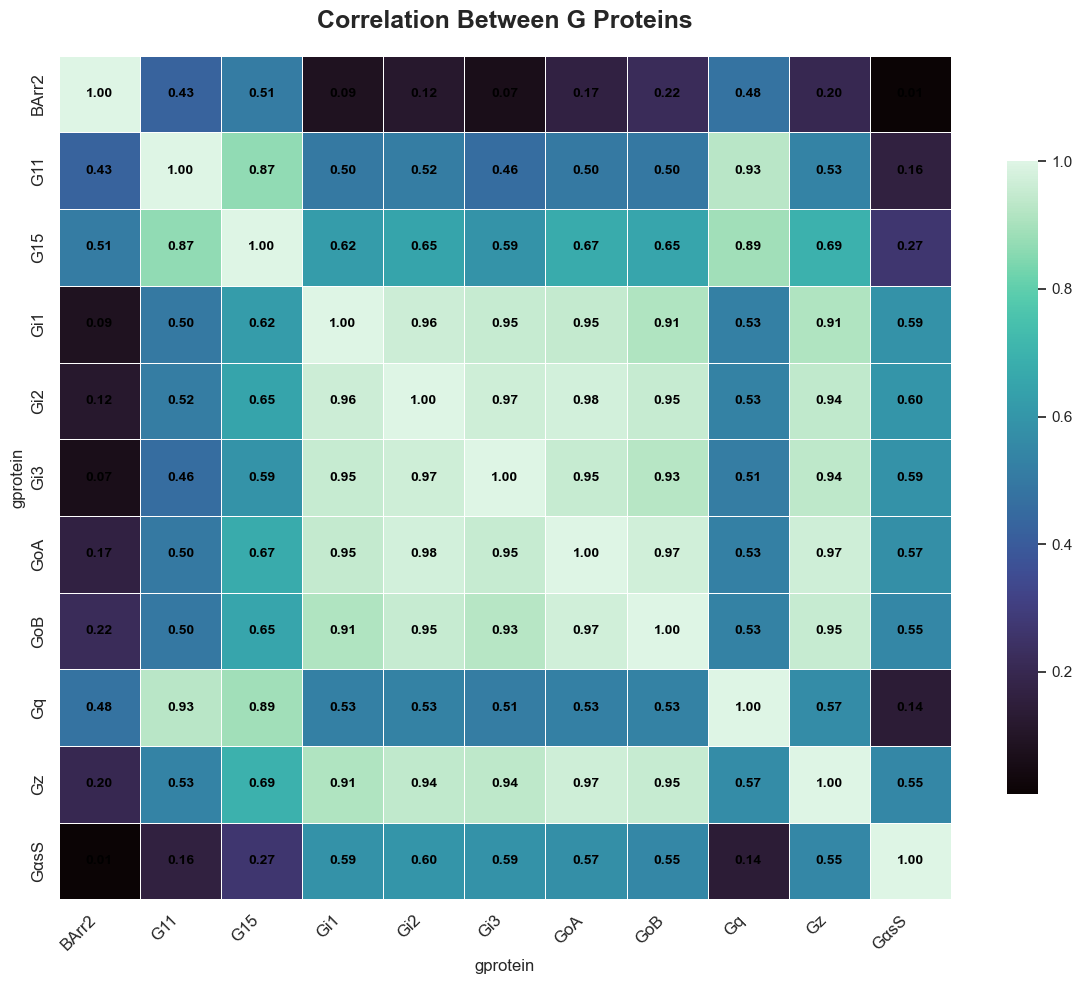

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme to mimic ggplot style
sns.set_theme(style="whitegrid")

# Create a figure with adjusted size
plt.figure(figsize=(12, 10))

# Draw the heatmap with a ggplot-style color palette
sns.heatmap(
    g_protein_corr,
    annot=True,
    fmt=".2f",
    cmap="mako",
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10, "weight": "bold", "color": "black"},
)

# Customize the title and axis labels
plt.title("Correlation Between G Proteins", fontsize=18, weight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
